In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

###Gráfico de série temporal

In [ ]:
df_main = pd.read_csv('simulacao-M.csv')
df_mudanca = pd.read_csv('simulacao-UM.csv')
df_Media_ultima = pd.read_csv('resultados_epocas.csv')
df_main

,Id da RUN,Score,Deliveres,steps,seed,status
0,1,151,6,148,1,completed
1,2,-58,6,201,2,completed
2,3,48,6,157,3,completed
3,4,88,6,170,4,completed
4,5,81,6,155,5,completed
...,...,...,...,...,...,...
245,246,65,6,141,246,completed
246,247,-25,6,164,247,completed
247,248,-127,6,226,248,completed
248,249,91,6,156,249,completed


In [ ]:
df_mudanca

,Id da RUN,Score,Deliveres,steps,seed,status
0,1,98,6,137,1,completed
1,2,-106,6,217,2,completed
2,3,88,6,139,3,completed
3,4,56,6,177,4,completed
4,5,50,6,171,5,completed
...,...,...,...,...,...,...
245,246,-52,6,152,246,completed
246,247,11,6,172,247,completed
247,248,-75,6,221,248,completed
248,249,91,6,156,249,completed


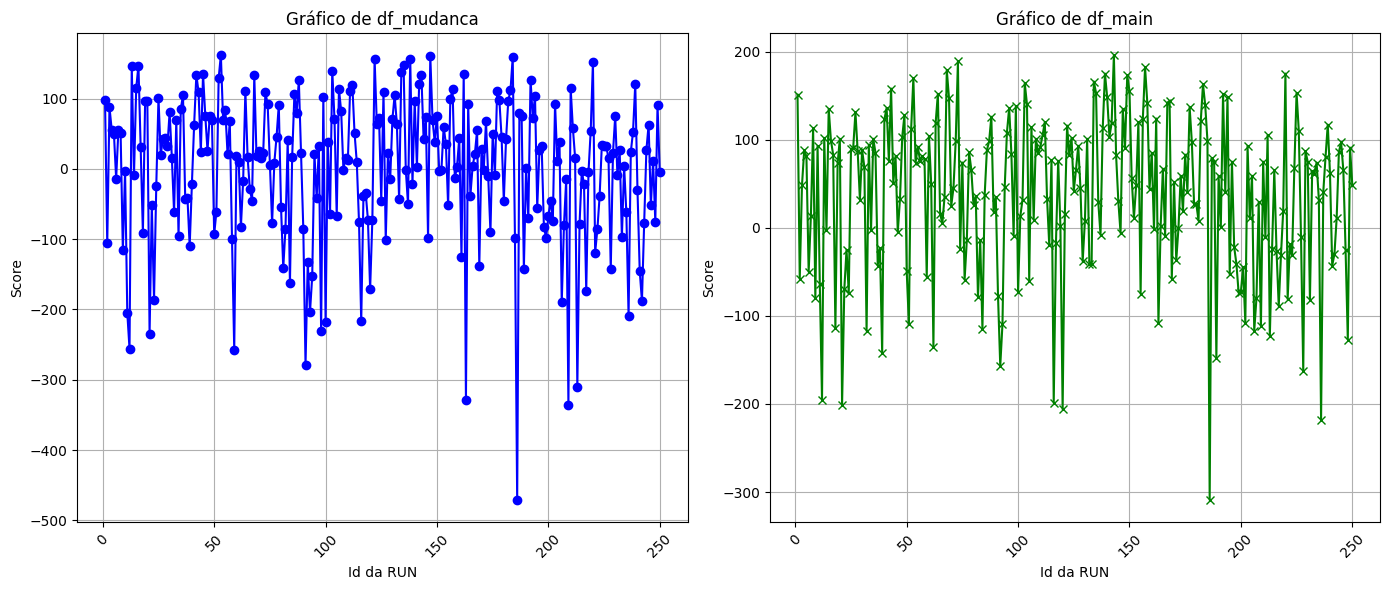

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes[0].plot(df_v2['Id da RUN'], df_mudanca['Score'], color='blue', marker='o')
axes[0].set_title('Gráfico de df_mudanca') # Adiciona um título ao subplot
axes[0].set_xlabel('Id da RUN')
axes[0].set_ylabel('Score')
axes[0].grid(True)
# Rotaciona os ticks do eixo x para este subplot específico
axes[0].tick_params(axis='x', rotation=45)

# --- Gráfico 2 (Direita) ---
# Usamos axes[1] para desenhar no segundo subplot.
axes[1].plot(df_main['Id da RUN'], df_main['Score'], color='green', marker='x')
axes[1].set_title('Gráfico de df_main') # Adiciona um título ao subplot
axes[1].set_xlabel('Id da RUN')
axes[1].set_ylabel('Score')
axes[1].grid(True)
# Rotaciona os ticks do eixo x para este subplot específico
axes[1].tick_params(axis='x', rotation=45)

# --- Finalização ---
# Ajusta o layout para evitar sobreposição de títulos e eixos
plt.tight_layout()
# Salva a figura com os dois gráficos
plt.savefig('graficos_lado_a_lado.png')
# Mostra o resultado
plt.show()

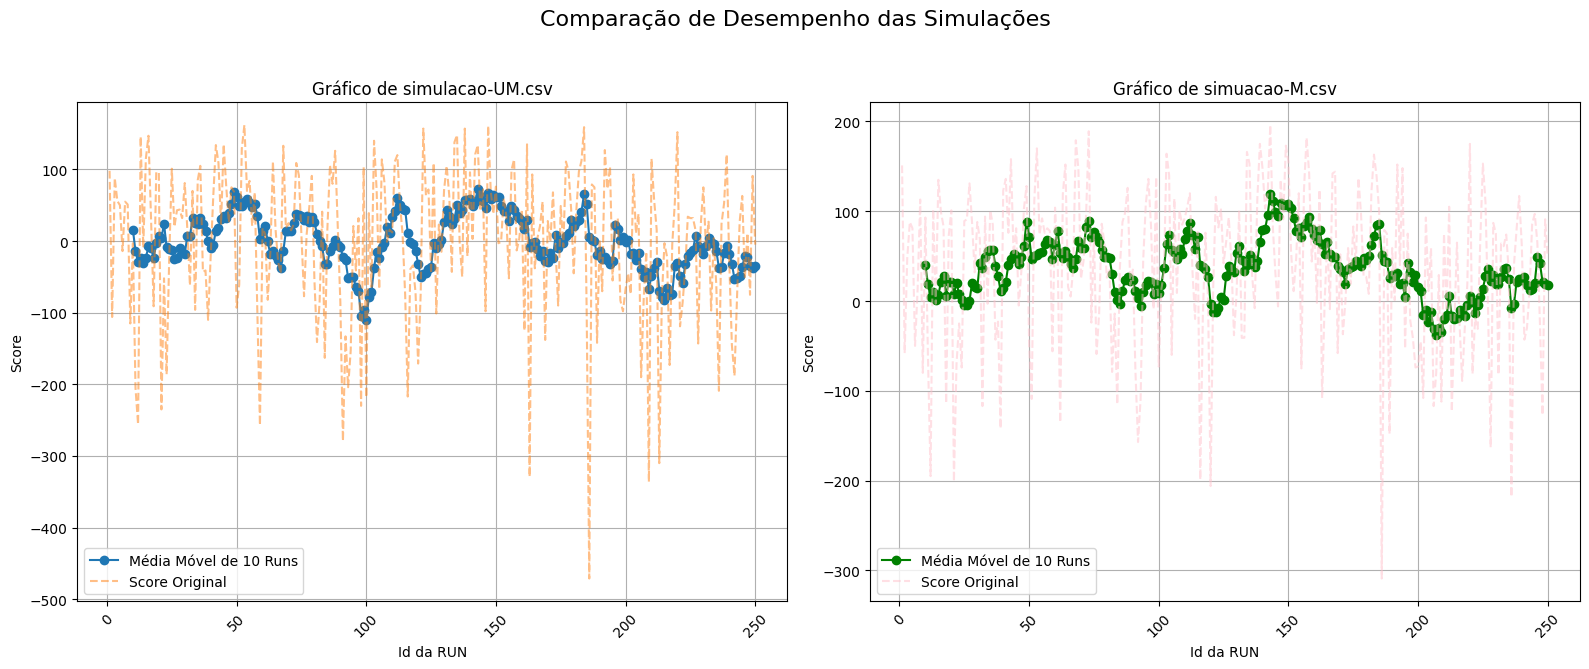

: 

In [ ]:
# Carregar os arquivos que você enviou.
df_main = pd.read_csv('simulacao-M.csv')
df_mudanca = pd.read_csv('simulacao-UM.csv')

# --- Seu Código ---
# Calcule a média móvel para cada DataFrame. 
# O resultado é uma Series, que pode ser usada diretamente na plotagem.
df_mudanca_m = df_mudanca['Score'].rolling(window=10).mean()
df_main_m = df_main['Score'].rolling(window=10).mean()

# Crie a figura e os eixos para os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

# Gráfico 1 (Esquerda) - Usando 'simulacao-UM.csv'
axes[0].plot(df_mudanca['Id da RUN'], df_mudanca_m, marker='o', linestyle='-', label='Média Móvel de 10 Runs')
axes[0].plot(df_mudanca['Id da RUN'], df_mudanca['Score'], linestyle='--', label='Score Original', alpha=0.5)
axes[0].set_title('Gráfico de simulacao-UM.csv')
axes[0].set_xlabel('Id da RUN')
axes[0].set_ylabel('Score')
axes[0].grid(True)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2 (Direita) - Usando 'simulacao-M.csv'
axes[1].plot(df_main['Id da RUN'], df_main_m, marker='o', linestyle='-', color='green', label='Média Móvel de 10 Runs')
axes[1].plot(df_main['Id da RUN'], df_main['Score'], linestyle='--', color='pink', label='Score Original', alpha=0.5)
axes[1].set_title('Gráfico de simuacao-M.csv')
axes[1].set_xlabel('Id da RUN')
axes[1].set_ylabel('Score')
axes[1].grid(True)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Adicionar um título geral à figura
fig.suptitle('Comparação de Desempenho das Simulações', fontsize=16)

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuste para o suptitle

# Salvar a imagem final
plt.savefig('comparacao_simulacoes.png')
plt.show()

Gerando o gráfico 'comparacao_simulacoes_geral.png'...


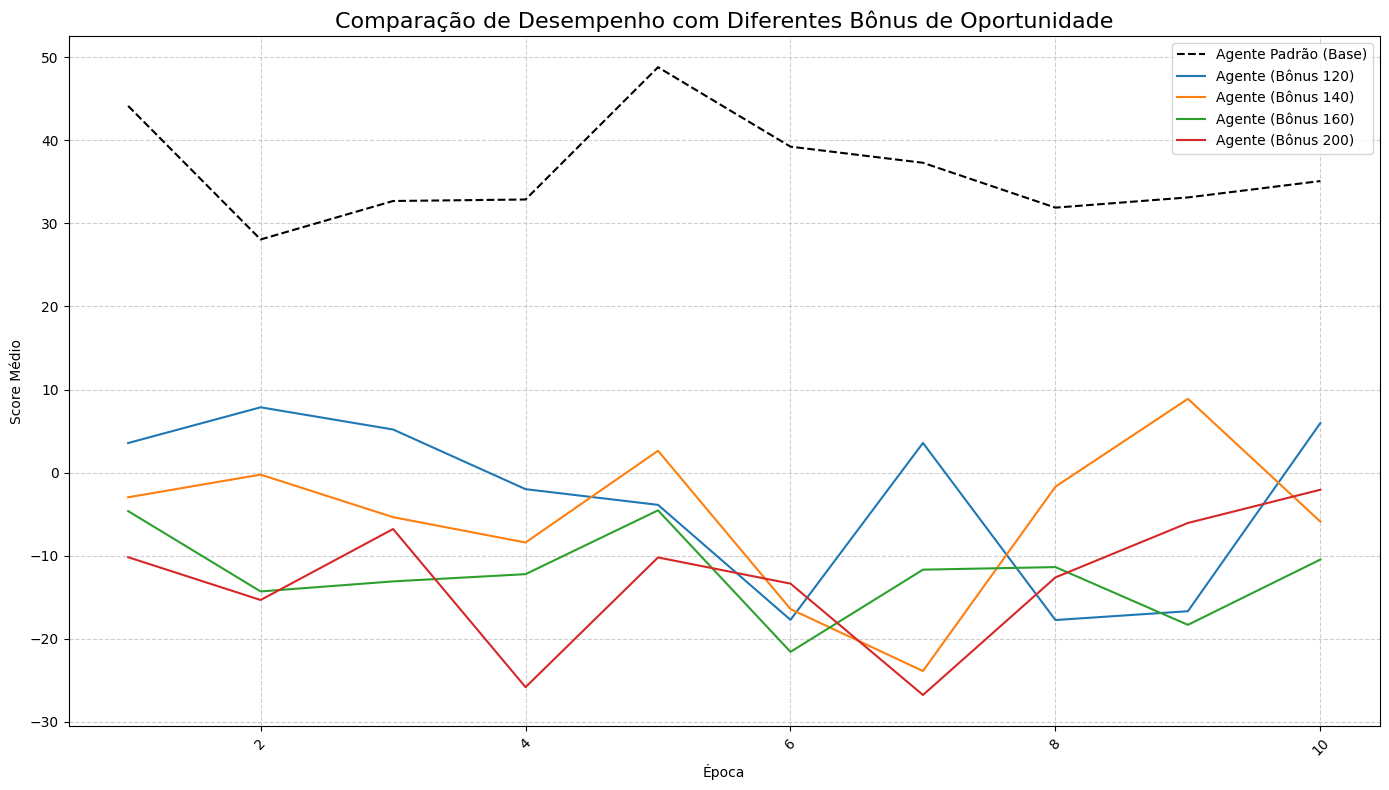

Gráfico salvo com sucesso!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar TODOS os arquivos CSV em DataFrames com nomes descritivos.
try:
    df_base = pd.read_csv('resultados_por_epoca.csv')
    df_120 = pd.read_csv('resultados_epocas_120.csv')
    df_140 = pd.read_csv('resultados_epocas_140.csv') # Você já usava este
    df_160 = pd.read_csv('resultados_epocas_160.csv')
    df_200 = pd.read_csv('resultados_epocas_200.csv')
except FileNotFoundError as e:
    print(f"Erro: Arquivo não encontrado - {e}. Verifique se todos os arquivos CSV estão na pasta correta.")
    # Interrompe a execução se um arquivo estiver faltando
    exit()


# 2. Criar uma ÚNICA figura e um único eixo (ax) para o gráfico.
#    Aumentamos o tamanho para acomodar melhor as legendas.
fig, ax = plt.subplots(figsize=(14, 8))

# 3. Plotar a linha de base (agente padrão) para referência.
#    Usamos uma linha tracejada para destacá-la como a base de comparação.
ax.plot(df_base['Epoca'], df_base['Score Medio'], linestyle='--', color='black', label='Agente Padrão (Base)')

# 4. Plotar uma linha para cada um dos agentes "melhorados".
#    O Matplotlib escolherá cores diferentes automaticamente.
ax.plot(df_120['Epoca'], df_120['Score Medio'], linestyle='solid', label='Agente (Bônus 120)')
ax.plot(df_140['Epoca'], df_140['Score Medio'], linestyle='solid', label='Agente (Bônus 140)')
ax.plot(df_160['Epoca'], df_160['Score Medio'], linestyle='solid', label='Agente (Bônus 160)')
ax.plot(df_200['Epoca'], df_200['Score Medio'], linestyle='solid', label='Agente (Bônus 200)')


# 5. Configurar os detalhes do gráfico (título, rótulos, legenda).
ax.set_title('Comparação de Desempenho com Diferentes Bônus de Oportunidade', fontsize=16)
ax.set_xlabel('Época')
ax.set_ylabel('Score Médio')
ax.grid(True, linestyle='--', alpha=0.6) # Grade suave para melhor visualização
ax.legend() # Essencial para identificar cada linha
ax.tick_params(axis='x', rotation=45)

# Ajustar o layout para garantir que nada seja cortado
plt.tight_layout()

# Salvar a imagem final e mostrar
print("Gerando o gráfico 'comparacao_simulacoes_geral.png'...")
plt.savefig('comparacao_simulacoes_geral.png')
plt.show()
